In [1]:
# Goal: Predict which apps will have the highest ratings
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 

In [2]:
# 1. Load the data file using pandas
df = pd.read_csv("googleplaystore.csv")


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
# Performing Data Wrangling

# 2. Checking for null values

df_missing=df.isna()
df_missing.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#2. Get the number of null values for each column.
for column in df_missing.columns.values.tolist():
    print(column)
    print(df_missing[column].value_counts())
    print("")

App
False    10841
Name: App, dtype: int64

Category
False    10841
Name: Category, dtype: int64

Rating
False    9367
True     1474
Name: Rating, dtype: int64

Reviews
False    10841
Name: Reviews, dtype: int64

Size
False    10841
Name: Size, dtype: int64

Installs
False    10841
Name: Installs, dtype: int64

Type
False    10840
True         1
Name: Type, dtype: int64

Price
False    10841
Name: Price, dtype: int64

Content Rating
False    10840
True         1
Name: Content Rating, dtype: int64

Genres
False    10841
Name: Genres, dtype: int64

Last Updated
False    10841
Name: Last Updated, dtype: int64

Current Ver
False    10833
True         8
Name: Current Ver, dtype: int64

Android Ver
False    10838
True         3
Name: Android Ver, dtype: int64



In [7]:
#3. Drop records with nulls in any of the columns. 
df.dropna(inplace=True)

In [8]:
df.shape

(9360, 13)

In [9]:
# 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
# 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
df["Size"].describe()

count                   9360
unique                   413
top       Varies with device
freq                    1637
Name: Size, dtype: object

In [11]:
def to_numeric(size_string):
    if size_string.endswith("M"):
        size_string=size_string[0:-1]
        size_string=float(size_string)*1000
    elif size_string.endswith("k"):
        size_string=size_string[0:-1]
    elif size_string=="Varies with device":
        size_string=0
    return size_string

In [12]:
df["Extracted_Size"]=df["Size"].apply(to_numeric)

In [13]:
df["Extracted_Size"].dtype

dtype('O')

In [14]:
df["Extracted_Size"]=df["Extracted_Size"].astype("float")

In [15]:
df["Extracted_Size"].dtype

dtype('float64')

In [16]:
# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df["Reviews"]=df["Reviews"].astype("float")

In [17]:
df["Installs"].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [18]:
def formatting(installs):
    if "+" in installs:
        installs=installs[0:-1]
    if "," in installs:
        installs=installs.replace(",","")
    installs=int(installs)  
    return installs

In [19]:
df["Installs"]=df["Installs"].apply(formatting)

In [20]:
#4. 4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [21]:
def price_formatting(price):
    if "$" in price:
        price=price.replace("$","")
    price=float(price)
    return price

In [22]:
df["Price"]=df["Price"].apply(price_formatting)

In [23]:
#5. Sanity checks:

#Average rating should be between 1 and 5 as only these values are allowed on the play store.
#Drop the rows that have a value outside this range.


df["Rating"][df["Rating"]<1]

Series([], Name: Rating, dtype: float64)

In [24]:
df["Rating"][df["Rating"]>5] # There are no rows with values outside the range 1-5

Series([], Name: Rating, dtype: float64)

In [25]:
#5.2 Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.

df[["Reviews","Installs"]][df["Reviews"]>df["Installs"]]

,Reviews,Installs
2454,4.0,1
4663,10249.0,10000
5917,2.0,1
6700,7.0,5
7402,11.0,10
8591,20.0,10
10697,2.0,1


In [26]:
# shape before dropping
df.shape

(9360, 14)

In [27]:
df.drop(df[["Reviews","Installs"]][df["Reviews"]>df["Installs"]].index, inplace = True)

In [28]:
# after dropping
df.shape

(9353, 14)

In [29]:
# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

df["Price"][df["Type"]=="Free"][df["Price"]==0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 8711, dtype: float64

In [30]:
df["Price"][df["Type"]=="Free"][df["Price"]>0] ## no rows to drop

Series([], Name: Price, dtype: float64)

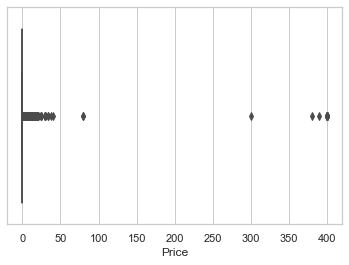

In [36]:
# Performing univariate analysis

# Boxplot for Price
sns.set_theme(style="whitegrid")
ax= sns.boxplot(x=df["Price"])

#Are there any outliers? Think about the price of usual apps on Play Store.
# Observation: Yes, there are outliers that are $300 and above

In [47]:
df["Reviews"].describe()

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews, dtype: float64

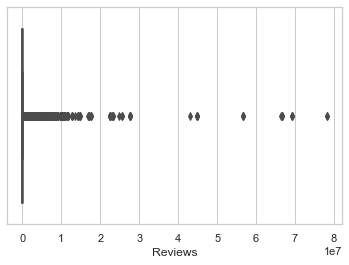

In [46]:
#Boxplot for Reviews
# Boxplot for Price

ax= sns.boxplot(x=df["Reviews"])

#ax.set(ylim=(0,10))
#Are there any apps with very high number of reviews? Do the values seem right?
# Observation: There are a few apps with a very high number of reviews, the highest being around 80 million. 
#These values seem a bit too high

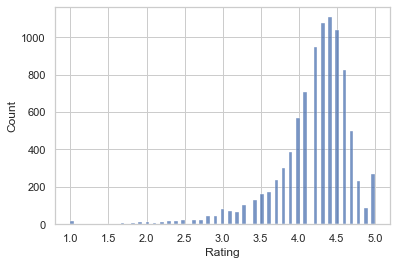

In [55]:
#Histogram for Rating
ax= sns.histplot(x=df["Rating"]) 
# Observation 
# The ratings are distributed around a mean value of 4.25, and is left-skewed. 



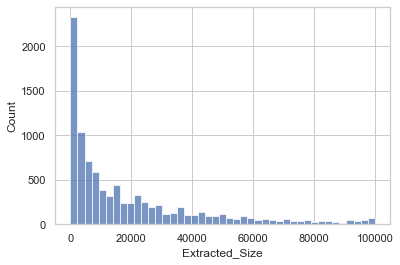

In [56]:
ax= sns.histplot(x=df["Extracted_Size"]) 
# Observation: Has outliers at around 1 million
# The distribution is Right-skewed 